In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

## Create graph

In [3]:
# create random graph
g = nx.erdos_renyi_graph(n=10, p=0.5, seed=42)

In [4]:
# add node properties such as weight and opinion
for node in g.nodes:
    g.nodes[node]['opinion'] = np.random.rand()
    g.nodes[node]['conformity'] = np.random.rand()
    g.nodes[node]['weight'] = np.random.rand()

# display thier properties
for node in g.nodes:
    print(g.nodes[node])

{'opinion': 0.701014732159846, 'conformity': 0.6663591728612485, 'weight': 0.0481018515804168}
{'opinion': 0.8205974472095053, 'conformity': 0.3873175496553013, 'weight': 0.8275115988900857}
{'opinion': 0.9774305848647881, 'conformity': 0.003109280713053608, 'weight': 0.9786346463645849}
{'opinion': 0.22861753428343978, 'conformity': 0.07386187805337319, 'weight': 0.09513089901455252}
{'opinion': 0.8424945938762067, 'conformity': 0.47570049105412937, 'weight': 0.6180504055676578}
{'opinion': 0.4082851322742268, 'conformity': 0.6676193565730388, 'weight': 0.8060217518978885}
{'opinion': 0.32181655204777415, 'conformity': 0.6546302906979963, 'weight': 0.14569728421061534}
{'opinion': 0.49264746694358863, 'conformity': 0.6158033496958192, 'weight': 0.17189058828123105}
{'opinion': 0.06550626314310115, 'conformity': 0.13961921954354994, 'weight': 0.2686250262885812}
{'opinion': 0.6144544555401427, 'conformity': 0.6786721918824128, 'weight': 0.6192581769321222}


## plot network

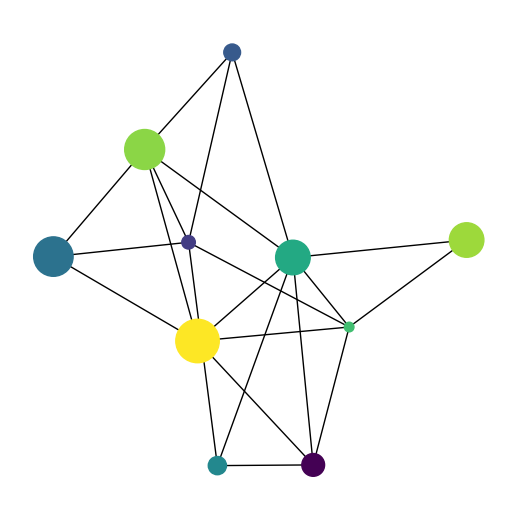

In [5]:
# plot network with weights as node size and opinions as node color
plt.figure(figsize=(5, 5))
nx.draw(g, node_size=[g.nodes[node]['weight']*1000 for node in g.nodes],
        node_color=[g.nodes[node]['opinion'] for node in g.nodes])
plt.show()

# Simulate

The following simulates

\begin{equation}
Y_i(t + 1) = \alpha_i Y_i(t) + (1 - \alpha_i) \frac{\sum_{j \in N} Y_j(t)}{d_i}
\end{equation}

In [36]:
# simulate
nodes = list(g.nodes())
result_opinions = []

for _ in range(0, 100):
    # create adjacency matrix
    adj_matrix = nx.adjacency_matrix(g).todense()

    # degree
    degrees = adj_matrix.sum(axis=1).reshape((-1, 1))

    # opinion
    opinions = np.array(nx.attr_matrix(g, node_attr='opinion')[1]).reshape((-1, 1))

    # conformity
    conformity = np.array(nx.attr_matrix(g, node_attr='conformity')[1]).reshape((-1, 1))

    # weight
    weight = np.array(nx.attr_matrix(g, node_attr='weight')[1]).reshape((-1, 1))

    # model / update opinion 
    new_opinions = conformity * opinions + (1 - conformity) * (adj_matrix * weight @ opinions) / degrees
    print(opinions.shape)

    # save
    result_opinions.append(new_opinions)

    # update
    for i, node in enumerate(g.nodes):
        g.nodes[node]['opinion'] = new_opinions[i][0]

(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


In [39]:
opinions

array([[8.28142327e-69],
       [8.34943160e-69],
       [1.24800193e-68],
       [1.13267124e-68],
       [8.09738212e-69],
       [1.11810430e-68],
       [8.54030693e-69],
       [1.22554472e-68],
       [4.97940586e-69],
       [1.15097225e-68]])

In [44]:
a = np.array([[1], [2], [3]])
b = np.array([[4], [5], [6]])

a * b

array([[ 4],
       [10],
       [18]])

In [40]:
opinions * opinions

array([[6.85819713e-137],
       [6.97130081e-137],
       [1.55750881e-136],
       [1.28294415e-136],
       [6.55675971e-137],
       [1.25015723e-136],
       [7.29368425e-137],
       [1.50195986e-136],
       [2.47944827e-137],
       [1.32473713e-136]])

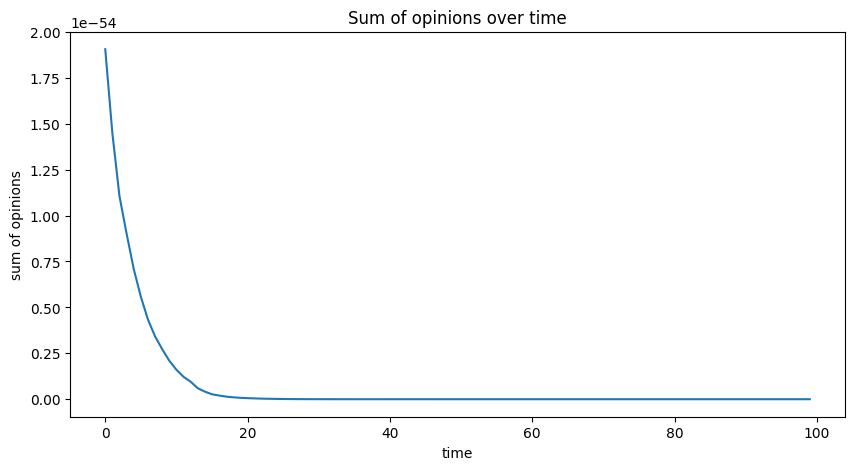

In [38]:
# plot each time of sum of opinions
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.array(result_opinions).sum(axis=1))
ax.set_xlabel('time')
ax.set_ylabel('sum of opinions')
ax.set_title('Sum of opinions over time')
plt.show()
